# Frequency domain filtering 
In this lesson, we will:
 * Use the DFT-2D to convert images
 * Design a filter in the frequency domain
 * Implement a 2nd order Butterworth low-pass
 

In [101]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [102]:
im_apollo11 = cv2.imread(os.path.relpath('../../Data/Apollo_11_Launch.jpg'), cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Phase')

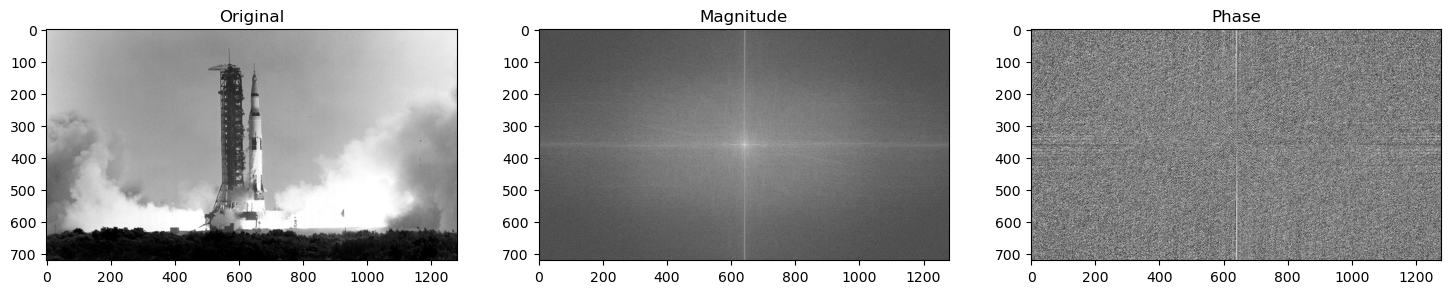

In [103]:
fourier = cv2.dft(np.float32(im_apollo11), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
phase =  np.arctan2(fourier_shift[:,:,1],fourier_shift[:,:,0])


# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(im_apollo11,cmap='gray');  plt.title("Original")
plt.subplot(132);plt.imshow(magnitude,cmap='gray');  plt.title("Magnitude")
plt.subplot(133);plt.imshow(phase,cmap='gray');  plt.title("Phase")

In [104]:
# Now let's design a simple low-pass filter.  This will be just a circle of 1's in the center of our spectrum

x, y = np.indices(magnitude.shape)
cx = magnitude.shape[0]/2
cy = magnitude.shape[1]/2
r = np.sqrt((x-cx)**2+(y-cy)**2)

# The nyquist would be the distance from the center 
cutoff = np.min([cx,cy])/8 # Let's do Nyquist/8

filter_mask = r < cutoff



Text(0.5, 1.0, 'Mask')

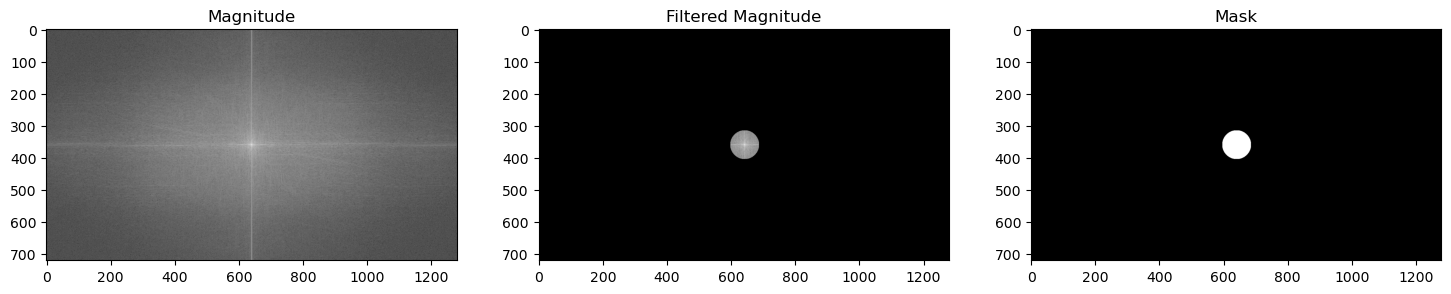

In [105]:
fourier_shift_filtered=np.zeros(fourier_shift.shape)
fourier_shift_filtered[:,:,0] = fourier_shift[:,:,0]*filter_mask
fourier_shift_filtered[:,:,1] = fourier_shift[:,:,1]*filter_mask

magnitude_filtered = magnitude*filter_mask

# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(magnitude,cmap='gray');  plt.title("Magnitude")
plt.subplot(132);plt.imshow(magnitude_filtered,cmap='gray');  plt.title("Filtered Magnitude")
plt.subplot(133);plt.imshow(filter_mask,cmap='gray');  plt.title("Mask")

In [106]:
# Now reconstruct

fourier_filtered = np.fft.ifftshift(fourier_shift_filtered)
im_apollo11_filtered = cv2.idft(fourier_filtered)

im_apollo11_filtered=cv2.magnitude(im_apollo11_filtered[:,:,0],im_apollo11_filtered[:,:,1])


Text(0.5, 1.0, 'Filtered')

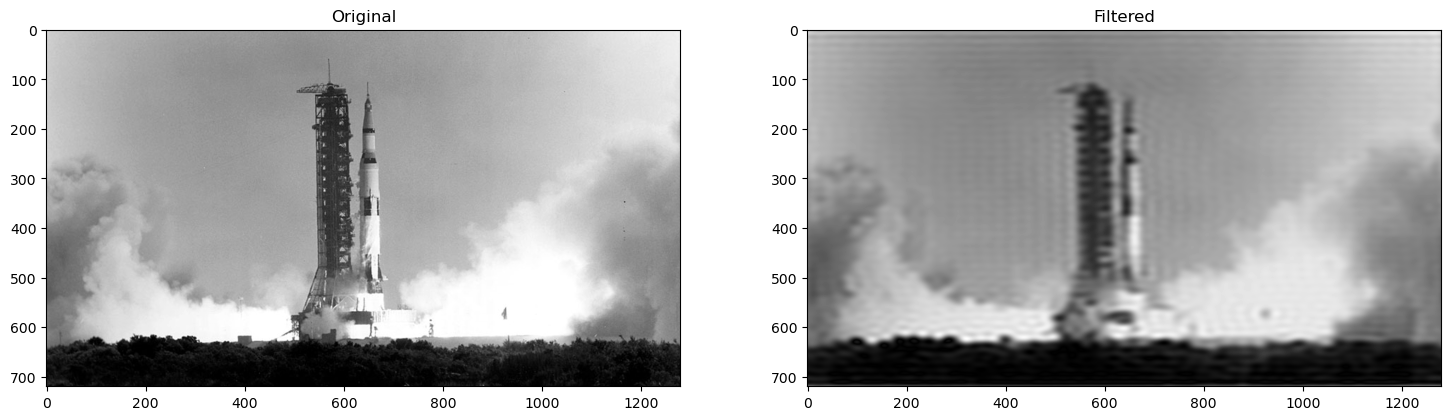

In [107]:
# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(im_apollo11,cmap='gray');  plt.title("Original")
plt.subplot(122);plt.imshow(im_apollo11_filtered,cmap='gray');  plt.title("Filtered")

## Butterworth filter

The butterworth filter is defined as $$H(f) = \frac{1}{\sqrt{(1+(f/fc)^{2*N}}}$$

In [108]:
x, y = np.indices(magnitude.shape)
cx = magnitude.shape[0]/2
cy = magnitude.shape[1]/2

r = np.sqrt((x-cx)**2+(y-cy)**2)

# The nyquist would be the distance from the center 
cutoff = np.min([cx,cy])/8 # Let's do Nyquist/8 as before

N=2 # Second order filter

filter_mask = 1/np.sqrt(1+(r/cutoff)**(2*N))



Text(0.5, 1.0, 'Mask')

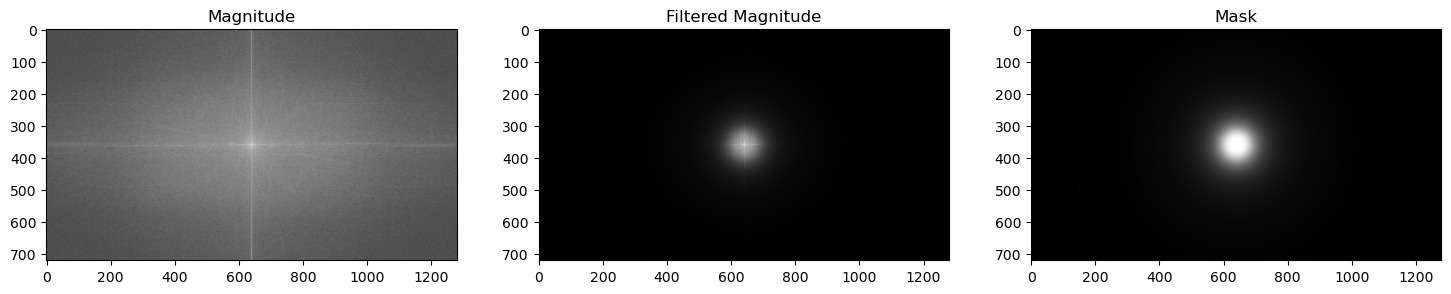

In [109]:
fourier_shift_filtered_butter=np.zeros(fourier_shift.shape)
fourier_shift_filtered_butter[:,:,0] = fourier_shift[:,:,0]*filter_mask
fourier_shift_filtered_butter[:,:,1] = fourier_shift[:,:,1]*filter_mask

magnitude_filtered_butter = magnitude*filter_mask

# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(magnitude,cmap='gray');  plt.title("Magnitude")
plt.subplot(132);plt.imshow(magnitude_filtered_butter,cmap='gray');  plt.title("Filtered Magnitude")
plt.subplot(133);plt.imshow(filter_mask,cmap='gray');  plt.title("Mask")

Text(0.5, 1.0, 'Filtered Butterworth')

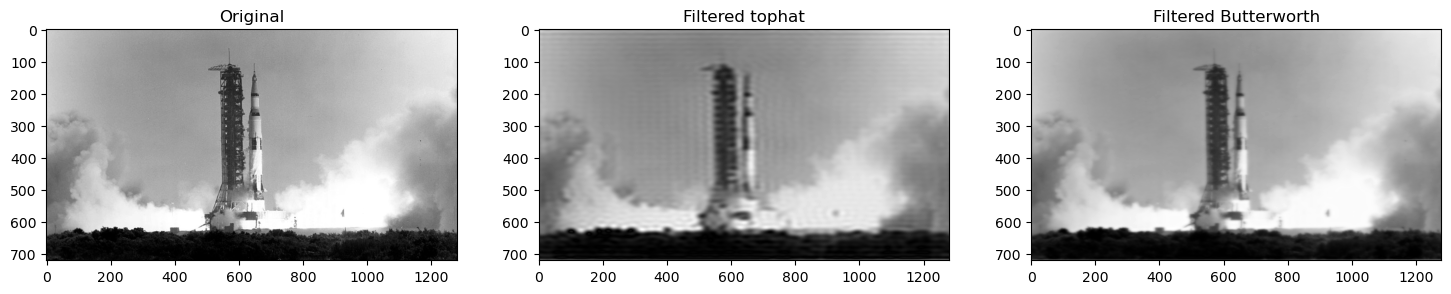

In [111]:
# Now reconstruct

fourier_filtered_butter = np.fft.ifftshift(fourier_shift_filtered_butter)
im_apollo11_filtered_butter = cv2.idft(fourier_filtered_butter)

im_apollo11_filtered_butter=cv2.magnitude(im_apollo11_filtered_butter[:,:,0],im_apollo11_filtered_butter[:,:,1])

# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(im_apollo11,cmap='gray');  plt.title("Original")
plt.subplot(132);plt.imshow(im_apollo11_filtered,cmap='gray');  plt.title("Filtered tophat")
plt.subplot(133);plt.imshow(im_apollo11_filtered_butter,cmap='gray');  plt.title("Filtered Butterworth")
